In [2]:
from olist.data import get_data, transform_datetime, data_cleaning_general
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in data

In [3]:
data = get_data()
data = data_cleaning_general(data)
data = transform_datetime(data)

In [4]:
orders = data["orders"]

In [6]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [7]:
orders["order_date"] = orders["order_purchase_timestamp"].dt.date

In [20]:
orders.order_date = pd.to_datetime(orders.order_date)

In [21]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-13


# Aggregate by order date

In [22]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_date                       datetime64[ns]
dtype: object

In [23]:
orders_per_day = orders[["order_date", "order_id"]].groupby(by = "order_date").agg(["count"])

In [31]:
orders_per_day.sort_index()

,order_id
,count
order_date,
2016-09-15,1
2016-10-03,7
2016-10-04,54
2016-10-05,35
2016-10-06,41
...,...
2018-08-25,69
2018-08-26,73


Fill out the missing days with 0

In [34]:
orders_per_day = orders_per_day.resample("D").mean().fillna(0)

In [47]:
orders_per_day.columns

MultiIndex([('order_id', 'count')],
           )

In [50]:
orders_per_day.columns = ["no_orders"]

## Development of order numbers

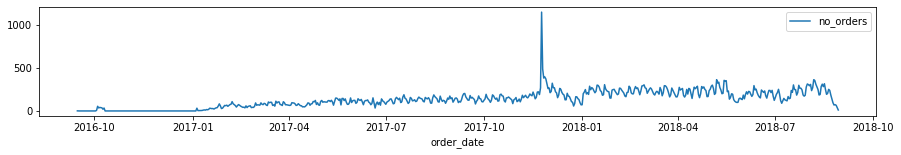

In [54]:
plt.figure(figsize=(15, 2))
sns.lineplot(data = orders_per_day);

There seems to be a major outlier. 

In [57]:
orders_per_day.sort_values(by = "no_orders", ascending=False).head(1)

,no_orders
order_date,
2017-11-24,1147.0


Short Google research indicates that there was a Black Friday event on 24.11.2017 (
https://www.independent.co.uk/news/world/black-friday-2017-brazil-shoppers-discount-sales-brazil-south-africa-a8073651.html)

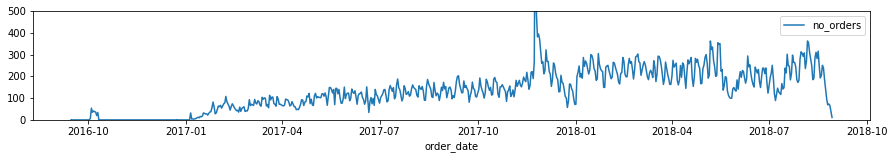

In [61]:
plt.figure(figsize=(15, 2))
sns.lineplot(data = orders_per_day)
plt.ylim((0, 500));

There seems to be an uprising path in the number of orders. 
I will cut off the last days as there might be missing orders that are not yet processed correctly. 

In [76]:
temp = orders_per_day.groupby(by = [orders_per_day.index.isocalendar().year, orders_per_day.index.isocalendar().week]).sum()

In [86]:
temp.reset_index(inplace=True)

0      32
1      32
2      32
3      32
4      32
       ..
98      2
99     32
100    32
101    34
102    34
Length: 103, dtype: int64

In [87]:
temp.index

RangeIndex(start=0, stop=103, step=1)

In [73]:
orders_per_day.index.isocalendar().

order_date
2016-09-15    37
2016-09-16    37
2016-09-17    37
2016-09-18    37
2016-09-19    38
              ..
2018-08-25    34
2018-08-26    34
2018-08-27    35
2018-08-28    35
2018-08-29    35
Freq: D, Name: week, Length: 714, dtype: UInt32

In [67]:
orders_per_day.index.week

/tmp/ipykernel_5240/2405484315.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  orders_per_day.index.week


Int64Index([37, 37, 37, 37, 38, 38, 38, 38, 38, 38,
            ...
            34, 34, 34, 34, 34, 34, 34, 35, 35, 35],
           dtype='int64', name='order_date', length=714)

## Development of turnover